<a href="https://colab.research.google.com/github/evanmahmud/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%pip install pandas-profiling

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
url = ('https://raw.githubusercontent.com/evanmahmud/Customer-Churn-Prediction/main/Customer_Churn.csv')
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
print(df.gender.unique())
print(df.SeniorCitizen.unique())
print(df.Partner.unique())
print(df.Dependents.unique())

print(df.tenure.unique())
print(df.PhoneService.unique())
print(df.MultipleLines.unique())
print(df.InternetService.unique())

print(df.OnlineSecurity.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())

print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())
print(df.Contract.unique())
print(df.PaperlessBilling.unique())

print(df.PaymentMethod.unique())
print(df.MonthlyCharges.unique())
print(df.TotalCharges.unique())
print(df.Churn.unique())


['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [21]:
df.TotalCharges.unique().sum()

'29.851889.5108.151840.75151.65820.51949.4301.93046.053487.95587.45326.85681.15036.32686.057895.151022.957382.25528.351862.939.65202.2520.153505.12970.31530.64749.1530.26369.451093.16766.95181.651874.4520.245.257251.7316.93548.33549.251105.4475.74872.35418.254861.45981.453906.797144.154217.84254.13838.751426.41752.65633.34456.351752.556311.27076.35894.37853.74707.15450.72962957.1857.25244.13650.352497.2930.9887.3549.051090.6570991424.6177.46139.52688.85482.252111.31216.679.35565.35496.94327.5973.35918.752215.451057927.11009.252570.274.75714.2571077459.05927.354748.7113.851107.22514.519.453605.63027.257611.85100.27303.05927.653921.31363.255238.93042.253954.12868.153423.5248.41126.351064.65835.152151.65515.45112.75229.55350.3562.93027.652135.51723.9519.753985.351215.651502.653260.135.4581.251188.21778.51277.751170.5570.456425.65563.655971.255289.051756.26416.761.3545.651929.951071.4564.35655.57930.555215.25113.51152.81821.95419.91024251.6764.551592.35135.23958.25233.91363.452736254.45265

In [22]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
#df['TotalCharges'] = df['TotalCharges'].astype(float)
df.TotalCharges.dtype

dtype('float64')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])


In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,Month-to-month,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,One year,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,Month-to-month,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,One year,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,2,70.70,151.65,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [27]:
df['Contract'] = le.fit_transform(df['Contract'])

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [30]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7590-VHVEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,NaN,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000


In [31]:
from ydata_profiling import ProfileReport

In [32]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
df.TotalCharges.fillna(df.TotalCharges.mean(),inplace = True)

<ipython-input-34-fd849200f036>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TotalCharges.fillna(df.TotalCharges.mean(),inplace = True)


In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [37]:
Target = df.pop('Churn')

In [38]:
df1 = df.pop('customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [39]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362


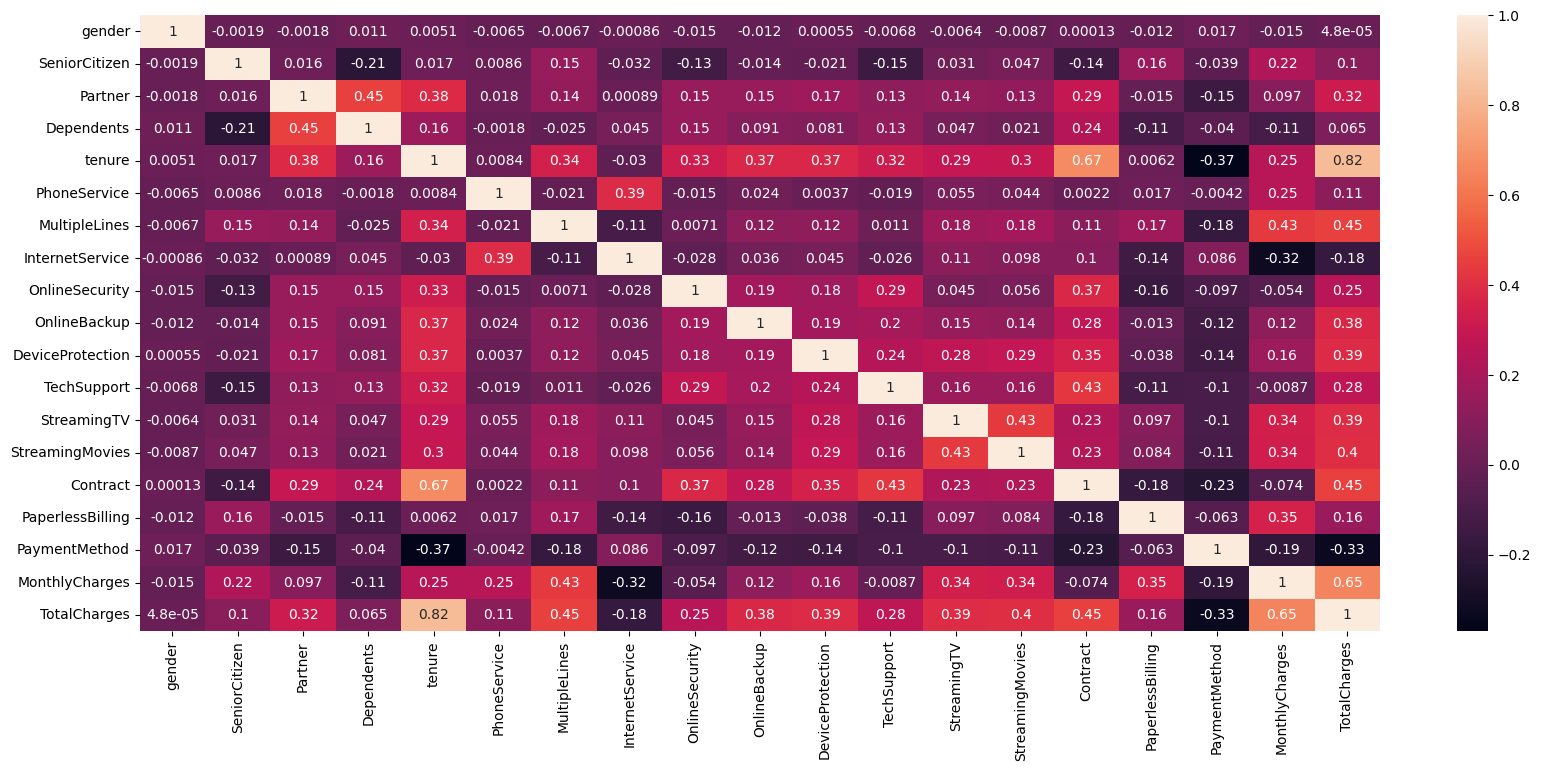

In [40]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(df, Target, train_size = 0.7)

In [42]:
X_Train.shape

(4930, 19)

In [43]:
X_Test.shape

(2113, 19)

In [44]:
Y_Train.shape

(4930,)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [46]:
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support
pd.options.mode.chained_assignment = None

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 0.7977687626774848
Testing Accuracy : 0.8116422148603881
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1573
           1       0.66      0.55      0.60       540

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



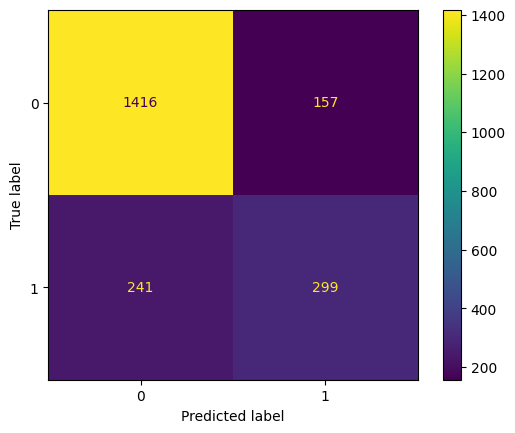

In [47]:
model = LogisticRegression()
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

Training Accuracy : 0.9987829614604462
Testing Accuracy : 0.7979176526265973
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1573
           1       0.63      0.49      0.56       540

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



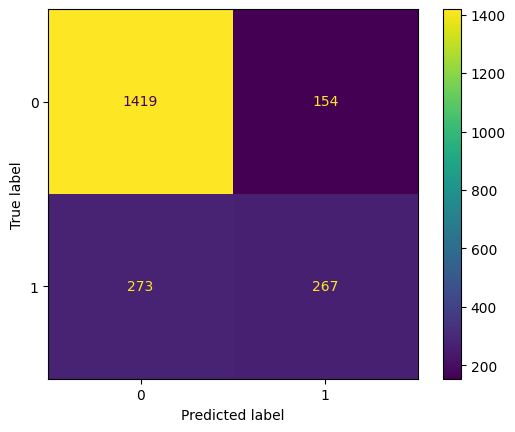

In [48]:
model = RandomForestClassifier(n_estimators= 100, random_state = 42)
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

Training Accuracy : 0.9987829614604462
Testing Accuracy : 0.7269285376242309
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1573
           1       0.47      0.52      0.49       540

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.74      0.73      0.73      2113



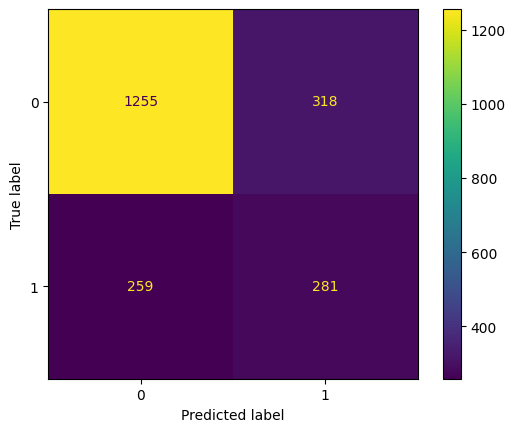

In [49]:
model = DecisionTreeClassifier()
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

Training Accuracy : 0.7545638945233266
Testing Accuracy : 0.7529578797917653
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1573
           1       0.51      0.73      0.60       540

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.75      0.77      2113



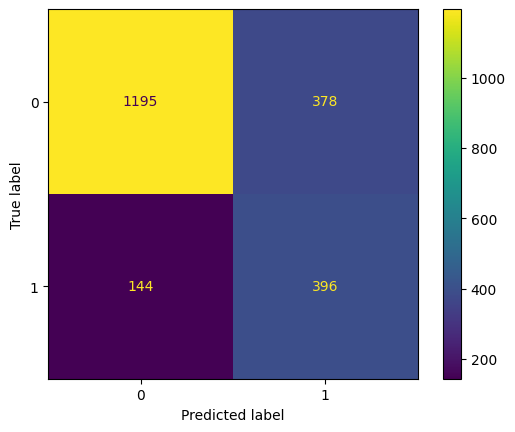

In [50]:
model = GaussianNB()
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

Training Accuracy : 0.8273833671399594
Testing Accuracy : 0.8121154756270705
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1573
           1       0.67      0.53      0.59       540

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



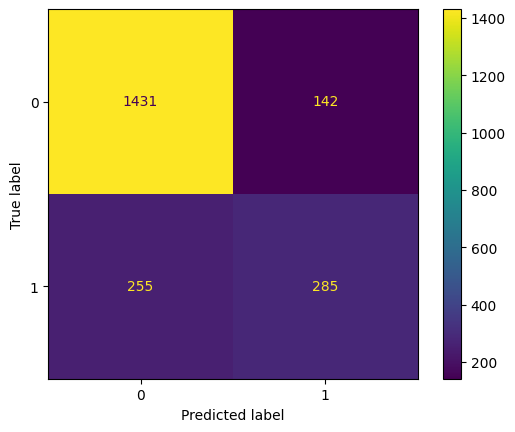

In [51]:
model = GradientBoostingClassifier()
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

Training Accuracy : 0.8028397565922921
Testing Accuracy : 0.8069096071935636
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1573
           1       0.64      0.55      0.59       540

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



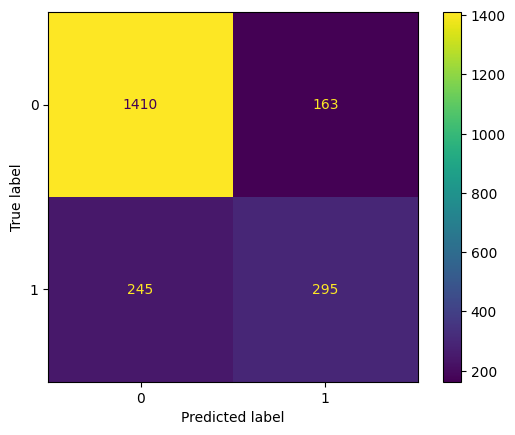

In [52]:
model = AdaBoostClassifier()
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

Training Accuracy : 0.7904665314401623
Testing Accuracy : 0.804070042593469
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1573
           1       0.68      0.44      0.54       540

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



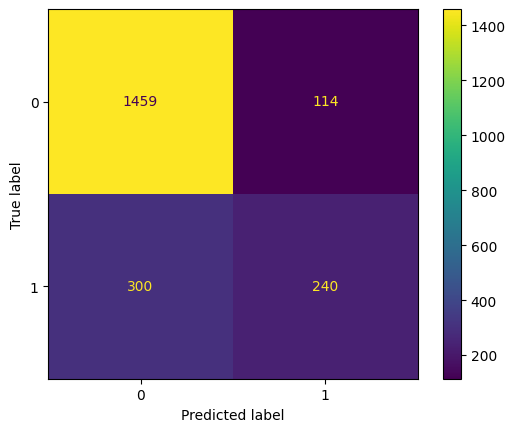

In [53]:
model = SVC(kernel = 'linear', C = 1, random_state = 42)
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

Training Accuracy : 0.8281947261663286
Testing Accuracy : 0.7718883104590629
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1573
           1       0.57      0.44      0.49       540

    accuracy                           0.77      2113
   macro avg       0.70      0.66      0.67      2113
weighted avg       0.76      0.77      0.76      2113



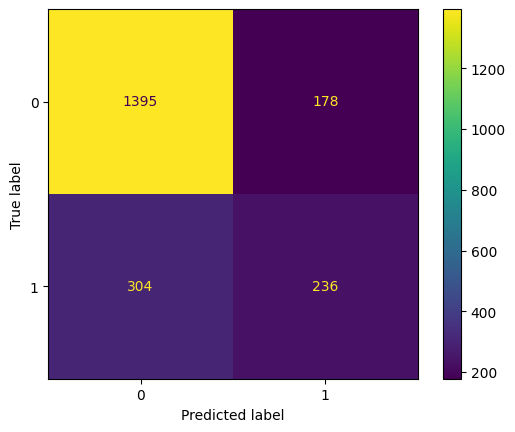

In [54]:
model = KNeighborsClassifier()
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

Training Accuracy : 0.7713995943204868
Testing Accuracy : 0.7799337434926644
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1573
           1       0.55      0.72      0.63       540

    accuracy                           0.78      2113
   macro avg       0.72      0.76      0.74      2113
weighted avg       0.81      0.78      0.79      2113



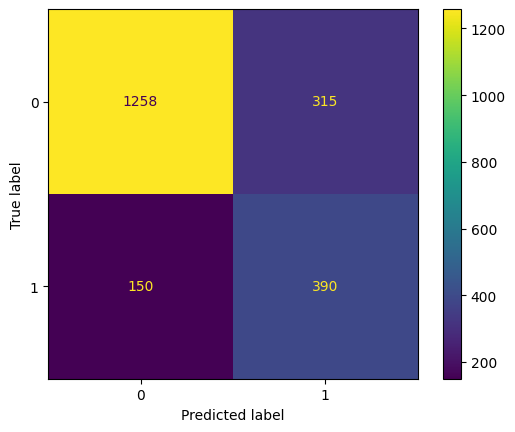

In [55]:
model = MLPClassifier()
model.fit(X_Train, Y_Train)

y_pred = model.predict(X_Test)

# evaluating the model
print("Training Accuracy :", model.score(X_Train, Y_Train))
print("Testing Accuracy :", model.score(X_Test, Y_Test))

# classification report
cr = classification_report(Y_Test, y_pred)
print(cr)
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model,X_Test,Y_Test)

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_Train, Y_Train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

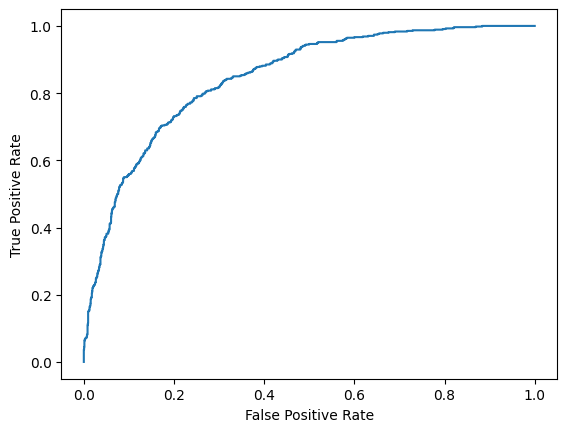

In [57]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = clf.decision_function(X_Test)

fpr, tpr, _ = roc_curve(Y_Test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

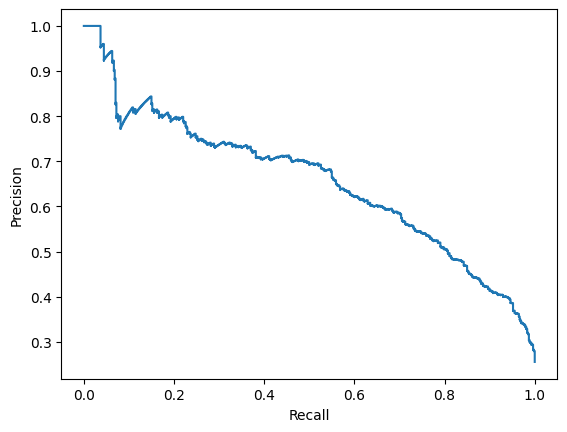

In [58]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(Y_Test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [59]:
'''lr = LogisticRegression()
svm = SVC(kernel = 'linear', C = 1, random_state = 42)
rfc = RandomForestClassifier(n_estimators= 100, random_state = 42)
dt = DecisionTreeClassifier()
nb = GaussianNB()
ada = AdaBoostClassifier()'''

"lr = LogisticRegression()\nsvm = SVC(kernel = 'linear', C = 1, random_state = 42)\nrfc = RandomForestClassifier(n_estimators= 100, random_state = 42)\ndt = DecisionTreeClassifier()\nnb = GaussianNB()\nada = AdaBoostClassifier()"

In [60]:
'''LRR = lr.fit(X_Train,Y_Train)
SVM = svm.fit(X_Train,Y_Train)
RFC = rfc.fit(X_Train,Y_Train)
DT = dt.fit(X_Train,Y_Train)
NB = nb.fit(X_Train,Y_Train)
ADA = ada.fit(X_Train,Y_Train)'''

'LRR = lr.fit(X_Train,Y_Train)\nSVM = svm.fit(X_Train,Y_Train)\nRFC = rfc.fit(X_Train,Y_Train)\nDT = dt.fit(X_Train,Y_Train)\nNB = nb.fit(X_Train,Y_Train)\nADA = ada.fit(X_Train,Y_Train)'

In [61]:
'''from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

scoring = {
    'precision' : make_scorer(precision_score, average = 'weighted'),
    'recall' : make_scorer(recall_score, average = 'weighted'),
    'f1_score' : make_scorer(f1_score, average = 'weighted')
}

'''

"from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score\nfrom sklearn.model_selection import cross_validate\n\nscoring = {\n    'precision' : make_scorer(precision_score, average = 'weighted'),\n    'recall' : make_scorer(recall_score, average = 'weighted'),\n    'f1_score' : make_scorer(f1_score, average = 'weighted')\n}\n\n"

In [62]:
'''cv_lr = cross_validate(LRR, X_Test, Y_Test, cv = 5, scoring = scoring)
cv_svm = cross_validate(SVM,X_Test,Y_Test, cv = 5, scoring = scoring)

cv_rfc = cross_validate(RFC, X_Test, Y_Test, cv = 5, scoring = scoring)
cv_dt = cross_validate(DT,X_Test,Y_Test, cv = 5, scoring = scoring)
cv_nb = cross_validate(NB, X_Test, Y_Test, cv = 5, scoring = scoring)
cv_ada = cross_validate(ADA,X_Test,Y_Test, cv = 5, scoring = scoring)
'''

'cv_lr = cross_validate(LRR, X_Test, Y_Test, cv = 5, scoring = scoring)\ncv_svm = cross_validate(SVM,X_Test,Y_Test, cv = 5, scoring = scoring)\n\ncv_rfc = cross_validate(RFC, X_Test, Y_Test, cv = 5, scoring = scoring)\ncv_dt = cross_validate(DT,X_Test,Y_Test, cv = 5, scoring = scoring)\ncv_nb = cross_validate(NB, X_Test, Y_Test, cv = 5, scoring = scoring)\ncv_ada = cross_validate(ADA,X_Test,Y_Test, cv = 5, scoring = scoring)\n'

In [63]:
'''print(cv_lr)
print(cv_svm)
print(cv_rfc)
print(cv_nb)
print(cv_dt)
print(cv_ada)'''

'print(cv_lr)\nprint(cv_svm)\nprint(cv_rfc)\nprint(cv_nb)\nprint(cv_dt)\nprint(cv_ada)'

In [64]:
'''plt.plot(cv_lr)'''

'plt.plot(cv_lr)'